<a href="https://colab.research.google.com/github/Jacky0111/Sentiment-Analysis/blob/master/Collection_of_Steam's_Best_Selling_Games_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NLP - Collection of Steam's Best Selling Games Reviews**
## **1. Import Library**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/4AEDcnDgWdXG6wB86EZe7HS5hZ9Q_hxwD7rMN886Gs8DRig3UlKnho0
Mounted at /content/drive


In [ ]:
!pip install pyenchant

     |████████████████████████████████| 61kB 1.7MB/s 


In [ ]:
!apt install -qq enchant

The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
Suggested packages:
  aspell-doc spellutils wordlist hunspell openoffice.org-hunspell
  | openoffice.org-core libenchant-voikko
The following NEW packages will be installed:
  aspell aspell-en dictionaries-common emacsen-common enchant hunspell-en-us
  libaspell15 libenchant1c2a libhunspell-1.6-0 libtext-iconv-perl
0 upgraded, 10 newly installed, 0 to remove and 39 not upgraded.
Need to get 1,310 kB of archives.
After this operation, 5,353 kB of additional disk space will be used.
Preconfiguring packages ...
Selecting previously unselected package libtext-iconv-perl.
(Reading database ... 144579 files and directories currently installed.)
Preparing to unpack .../0-libt

In [ ]:
import pandas as pd
import numpy as np
import re
import string
import math
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import enchant 
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score

# Handling Imbalanced Data
from imblearn.under_sampling import NearMiss
from collections import Counter

# Visualizing Wordcloud
from wordcloud import WordCloud

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
import nltk
nltk.download('punkt')
nltk.download('words')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


## **2.  Data Overview**

In [ ]:
# Import dataset from Shared drives
steam_reviews = pd.read_csv('/content/drive/Shared drives/AI(Lim_Chia_Chung&Lim_Yih_Feng)/steam_reviews.csv')
steam_reviews.head()

,date_posted,funny,helpful,hour_played,is_early_access_review,recommendation,review,title
0,10/02/2019,2,4,578,False,Recommended,&gt Played as German Reich&gt Declare war on B...,Expansion - Hearts of Iron IV: Man the Guns
1,10/02/2019,0,0,184,False,Recommended,yes.,Expansion - Hearts of Iron IV: Man the Guns
2,07/02/2019,0,0,892,False,Recommended,Very good game although a bit overpriced in my...,Expansion - Hearts of Iron IV: Man the Guns
3,14/06/2018,126,1086,676,False,Recommended,Out of all the reviews I wrote This one is pro...,Dead by Daylight
4,20/06/2017,85,2139,612,False,Recommended,Disclaimer I survivor main. I play games for f...,Dead by Daylight


In [ ]:
print ("Rows     : " , steam_reviews.shape[0])
print ("Columns  : " , steam_reviews.shape[1])
print ("Features : " , steam_reviews.columns.tolist())

Rows     :  31718
Columns  :  8
Features :  ['date_posted', 'funny', 'helpful', 'hour_played', 'is_early_access_review', 'recommendation', 'review', 'title']


In [ ]:
print(f'Original Shape of Data: {steam_reviews.shape}')

Original Shape of Data: (31718, 8)


In [ ]:
steam_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31718 entries, 0 to 31717
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date_posted             31718 non-null  object
 1   funny                   31718 non-null  int64 
 2   helpful                 31718 non-null  int64 
 3   hour_played             31718 non-null  int64 
 4   is_early_access_review  31718 non-null  bool  
 5   recommendation          31718 non-null  object
 6   review                  31662 non-null  object
 7   title                   31718 non-null  object
dtypes: bool(1), int64(3), object(4)
memory usage: 1.7+ MB


In [ ]:
steam_reviews.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
funny,31718.0,0.534807,18.009786,0.0,0.0,0.0,0.00,2458.0
helpful,31718.0,1.347531,35.679882,0.0,0.0,0.0,0.00,4632.0
hour_played,31718.0,235.186235,374.435866,0.0,27.0,112.0,283.75,11579.0


In [ ]:
count = steam_reviews.isnull().sum().sort_values(ascending = False)
percentage = ((steam_reviews.isnull().sum() / len(steam_reviews) * 100).sort_values(ascending = False))
data_missing = pd.concat([count, percentage], axis = 1, keys = ['Count', 'Percentage'])

print('Count and Percentage of missing values for the columns: ')
data_missing

Count and Percentage of missing values for the columns: 


,Count,Percentage
review,56,0.176556
title,0,0.000000
recommendation,0,0.000000
is_early_access_review,0,0.000000
hour_played,0,0.000000
helpful,0,0.000000
funny,0,0.000000
date_posted,0,0.000000


In [ ]:
# Drop rows which contains any NaN or missing value
steam_reviews = steam_reviews.dropna()
steam_reviews.shape

(31662, 8)

In [ ]:
count = steam_reviews.isnull().sum().sort_values(ascending = False)
percentage = ((steam_reviews.isnull().sum() / len(steam_reviews) * 100).sort_values(ascending = False))
data_missing = pd.concat([count, percentage], axis = 1, keys = ['Count', 'Percentage'])

print('Count and Percentage of missing values for the columns: ')
data_missing

Count and Percentage of missing values for the columns: 


,Count,Percentage
title,0,0.0
review,0,0.0
recommendation,0,0.0
is_early_access_review,0,0.0
hour_played,0,0.0
helpful,0,0.0
funny,0,0.0
date_posted,0,0.0


**No more missing value and NaN**

## **3. Data Preprocessing (Text Analysis Operations)**


In [ ]:
# Removing unwanted columns
steam_reviews = steam_reviews.loc[:, steam_reviews.columns.intersection(['recommendation','review'])]
print(f'Updated Shape of Data: {steam_reviews.shape}')

Updated Shape of Data: (31662, 2)


### **3.1 Convert to Lower-case & Remove Punctuation**

In [ ]:
def text_clean(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    
    return text

cleaned = lambda x: text_clean(x)

In [ ]:
steam_reviews['new_review'] = steam_reviews['review'].apply(cleaned)
steam_reviews.head(10)

,recommendation,review,new_review
0,Recommended,&gt Played as German Reich&gt Declare war on B...,gt played as german reichgt declare war on bel...
1,Recommended,yes.,yes
2,Recommended,Very good game although a bit overpriced in my...,very good game although a bit overpriced in my...
3,Recommended,Out of all the reviews I wrote This one is pro...,out of all the reviews i wrote this one is pro...
4,Recommended,Disclaimer I survivor main. I play games for f...,disclaimer i survivor main i play games for fu...
5,Recommended,ENGLISH After playing for more than two years ...,english after playing for more than two years ...
6,Recommended,Out of all the reviews I wrote This one is pro...,out of all the reviews i wrote this one is pro...
7,Recommended,I have never been told to kill myself more tha...,i have never been told to kill myself more tha...
8,Recommended,Any longtime Dead by Daylight player knows tha...,any longtime dead by daylight player knows tha...
9,Recommended,if you think cs go is toxic try this game,if you think cs go is toxic try this game


### **3.2 Tokenization**

In [ ]:
def tokens(text):
    tokens = nltk.word_tokenize(str(text))
    # taken only words (not punctuation)
    token_words = [w for w in tokens if w.isalpha()]
    return token_words

cleaned1 = lambda x: tokens(x)

In [ ]:
steam_reviews['new_review'] = steam_reviews['new_review'].apply(cleaned1)
steam_reviews.head(10)

,recommendation,review,new_review
0,Recommended,&gt Played as German Reich&gt Declare war on B...,"[gt, played, as, german, reichgt, declare, war..."
1,Recommended,yes.,[yes]
2,Recommended,Very good game although a bit overpriced in my...,"[very, good, game, although, a, bit, overprice..."
3,Recommended,Out of all the reviews I wrote This one is pro...,"[out, of, all, the, reviews, i, wrote, this, o..."
4,Recommended,Disclaimer I survivor main. I play games for f...,"[disclaimer, i, survivor, main, i, play, games..."
5,Recommended,ENGLISH After playing for more than two years ...,"[english, after, playing, for, more, than, two..."
6,Recommended,Out of all the reviews I wrote This one is pro...,"[out, of, all, the, reviews, i, wrote, this, o..."
7,Recommended,I have never been told to kill myself more tha...,"[i, have, never, been, told, to, kill, myself,..."
8,Recommended,Any longtime Dead by Daylight player knows tha...,"[any, longtime, dead, by, daylight, player, kn..."
9,Recommended,if you think cs go is toxic try this game,"[if, you, think, cs, go, is, toxic, try, this,..."


### **3.3 Remove Stopwords**

In [ ]:
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
  remove = [w for w in text if w not in stop_words]
  return remove

cleaned2 = lambda x: remove_stopwords(x)

In [ ]:
steam_reviews['new_review'] = steam_reviews['new_review'].apply(cleaned2)
steam_reviews.head(10)

,recommendation,review,new_review
0,Recommended,&gt Played as German Reich&gt Declare war on B...,"[gt, played, german, reichgt, declare, war, be..."
1,Recommended,yes.,[yes]
2,Recommended,Very good game although a bit overpriced in my...,"[good, game, although, bit, overpriced, opinio..."
3,Recommended,Out of all the reviews I wrote This one is pro...,"[reviews, wrote, one, probably, serious, one, ..."
4,Recommended,Disclaimer I survivor main. I play games for f...,"[disclaimer, survivor, main, play, games, fun,..."
5,Recommended,ENGLISH After playing for more than two years ...,"[english, playing, two, years, given, task, re..."
6,Recommended,Out of all the reviews I wrote This one is pro...,"[reviews, wrote, one, probably, serious, one, ..."
7,Recommended,I have never been told to kill myself more tha...,"[never, told, kill, playing, game]"
8,Recommended,Any longtime Dead by Daylight player knows tha...,"[longtime, dead, daylight, player, knows, isnt..."
9,Recommended,if you think cs go is toxic try this game,"[think, cs, go, toxic, try, game]"


### **3.4 Lemmatization**

In [ ]:
# Lemmatize the verb
def lem1(text):
    wordnet = WordNetLemmatizer()
    lemma_words = []
    for w in text:
      lemma_words.append(wordnet.lemmatize(w,'v'))

    return lemma_words
    
cleaned3 = lambda x: lem1(x)

In [ ]:
steam_reviews['new_review'] = steam_reviews['new_review'].apply(cleaned3)
steam_reviews.head(10)

,recommendation,review,new_review
0,Recommended,&gt Played as German Reich&gt Declare war on B...,"[gt, play, german, reichgt, declare, war, belg..."
1,Recommended,yes.,[yes]
2,Recommended,Very good game although a bit overpriced in my...,"[good, game, although, bite, overprice, opinio..."
3,Recommended,Out of all the reviews I wrote This one is pro...,"[review, write, one, probably, serious, one, w..."
4,Recommended,Disclaimer I survivor main. I play games for f...,"[disclaimer, survivor, main, play, game, fun, ..."
5,Recommended,ENGLISH After playing for more than two years ...,"[english, play, two, years, give, task, review..."
6,Recommended,Out of all the reviews I wrote This one is pro...,"[review, write, one, probably, serious, one, w..."
7,Recommended,I have never been told to kill myself more tha...,"[never, tell, kill, play, game]"
8,Recommended,Any longtime Dead by Daylight player knows tha...,"[longtime, dead, daylight, player, know, isnt,..."
9,Recommended,if you think cs go is toxic try this game,"[think, cs, go, toxic, try, game]"


In [ ]:
# Lemmatize the nouns
def lem2(text):
    wordnet = WordNetLemmatizer()
    lemma_words = []
    for w in text:
      lemma_words.append(wordnet.lemmatize(w,'n'))

    return lemma_words
    
cleaned4 = lambda x: lem2(x)

In [ ]:
steam_reviews['new_review'] = steam_reviews['new_review'].apply(cleaned4)
steam_reviews.head(10)

,recommendation,review,new_review
0,Recommended,&gt Played as German Reich&gt Declare war on B...,"[gt, play, german, reichgt, declare, war, belg..."
1,Recommended,yes.,[yes]
2,Recommended,Very good game although a bit overpriced in my...,"[good, game, although, bite, overprice, opinio..."
3,Recommended,Out of all the reviews I wrote This one is pro...,"[review, write, one, probably, serious, one, w..."
4,Recommended,Disclaimer I survivor main. I play games for f...,"[disclaimer, survivor, main, play, game, fun, ..."
5,Recommended,ENGLISH After playing for more than two years ...,"[english, play, two, year, give, task, review,..."
6,Recommended,Out of all the reviews I wrote This one is pro...,"[review, write, one, probably, serious, one, w..."
7,Recommended,I have never been told to kill myself more tha...,"[never, tell, kill, play, game]"
8,Recommended,Any longtime Dead by Daylight player knows tha...,"[longtime, dead, daylight, player, know, isnt,..."
9,Recommended,if you think cs go is toxic try this game,"[think, c, go, toxic, try, game]"


### **3.5 Remove Non-English Words**

In [ ]:
dictionary = enchant.Dict("en_US")

def remove_non_english(text):
  remove = []
  for w in text:
    if dictionary.check(w):
      remove.append(w)
    
  return remove

cleaned5 = lambda x: remove_non_english(x)

In [ ]:
steam_reviews['new_review'] = steam_reviews['new_review'].apply(cleaned5)
steam_reviews.head(10)

,recommendation,review,new_review
0,Recommended,&gt Played as German Reich&gt Declare war on B...,"[gt, play, declare, war, cant, break, go, capi..."
1,Recommended,yes.,[yes]
2,Recommended,Very good game although a bit overpriced in my...,"[good, game, although, bite, overprice, opinio..."
3,Recommended,Out of all the reviews I wrote This one is pro...,"[review, write, one, probably, serious, one, w..."
4,Recommended,Disclaimer I survivor main. I play games for f...,"[disclaimer, survivor, main, play, game, fun, ..."
5,Recommended,ENGLISH After playing for more than two years ...,"[play, two, year, give, task, review, game, re..."
6,Recommended,Out of all the reviews I wrote This one is pro...,"[review, write, one, probably, serious, one, w..."
7,Recommended,I have never been told to kill myself more tha...,"[never, tell, kill, play, game]"
8,Recommended,Any longtime Dead by Daylight player knows tha...,"[longtime, dead, daylight, player, know, horro..."
9,Recommended,if you think cs go is toxic try this game,"[think, c, go, toxic, try, game]"


### **3.6 Label Encoder**

In [ ]:
# Convert the recommendation to int
le = LabelEncoder()
steam_reviews['new_recommendation'] = le.fit_transform(steam_reviews['recommendation'])
steam_reviews = steam_reviews.drop(['recommendation'],axis=1)

# Removing review column
steam_reviews.drop(columns = ['review'], inplace = True)
print(f'Updated Shape of Data: {steam_reviews.shape}')

Updated Shape of Data: (31662, 2)


In [ ]:
steam_reviews.head()

,new_review,new_recommendation
0,"[gt, play, declare, war, cant, break, go, capi...",1
1,[yes],1
2,"[good, game, although, bite, overprice, opinio...",1
3,"[review, write, one, probably, serious, one, w...",1
4,"[disclaimer, survivor, main, play, game, fun, ...",1


## **4. Sentiment Analysis**
### **4.2 Wordcloud Visualizing**

In [ ]:
not_recommended = steam_reviews[steam_reviews['new_recommendation'] == 0]
not_recommended = not_recommended['new_review']
recommended = steam_reviews[steam_reviews['new_recommendation'] == 1]
recommended = recommended['new_review']

In [ ]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(str(data))
    
    wordcloud = WordCloud(background_color=color,
                          width=2500,
                          height=2000
                          ).generate(str(data))
    plt.figure(1,figsize=(25, 9))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

Positive words


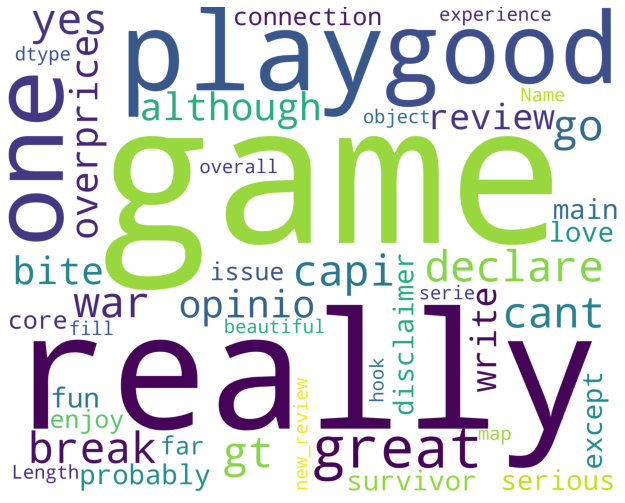

Negative words


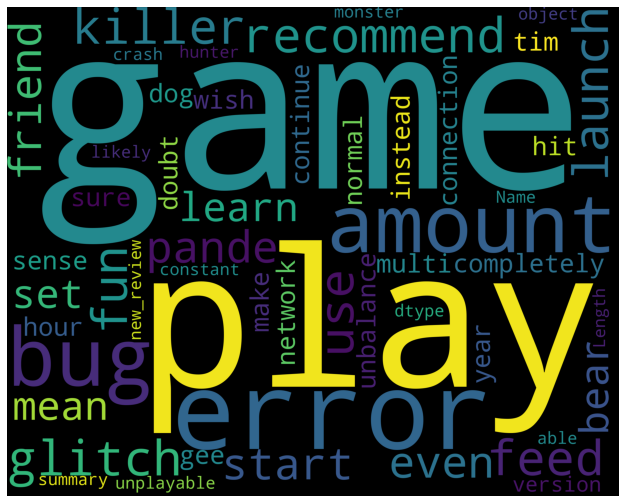

In [ ]:
print("Positive words")
wordcloud_draw(recommended,'white')
print("Negative words")
wordcloud_draw(not_recommended)

### **4.3 Feature Generation using Bag-of-words**

In [ ]:
def norm_docs(text):
  text = ' '.join(text)
  return text

norm_docs = np.vectorize(norm_docs) 
normalized_documents = norm_docs(steam_reviews['new_review'])

count_vectorizer = CountVectorizer()

bag_of_words = count_vectorizer.fit_transform(normalized_documents)
feature_names = count_vectorizer.get_feature_names()
pd.DataFrame(bag_of_words.toarray(), columns = feature_names)

,ab,abandon,abandonment,abduct,aberration,abhor,abhorrent,abide,ability,abject,able,abnormal,abnormally,aboard,abominable,abomination,abort,abortion,abound,abrasive,abrupt,abruptly,absence,absent,absolute,absolutely,absolution,absorb,abstract,abstraction,absurd,absurdity,absurdly,abundance,abundant,abundantly,abuse,abuser,abusive,abysmal,...,yeah,year,yearn,yell,yellow,yellowish,yelp,yep,yer,yes,yesterday,yet,yeti,yield,yikes,yo,yoga,yoke,yolk,yore,young,younger,youngest,yr,yuck,yummy,yup,zap,zappy,zealous,zen,zero,zest,zinger,zip,zit,zombie,zone,zoo,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31657,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31658,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31659,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
31660,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
print(count_vectorizer.vocabulary_)

{'gt': 4019, 'play': 6779, 'declare': 2242, 'war': 10216, 'cant': 1233, 'break': 1048, 'go': 3879, 'capitulate': 1245, 'order': 6292, 'get': 3813, 'true': 9611, 'blitzkrieg': 909, 'game': 3748, 'dad': 2145, 'yes': 10519, 'good': 3898, 'although': 282, 'bite': 862, 'overprice': 6410, 'opinion': 6262, 'id': 4445, 'prefer': 6953, 'mod': 5791, 'historical': 4278, 'accuracy': 69, 'vanilla': 10033, 'version': 10087, 'review': 7715, 'write': 10493, 'one': 6237, 'probably': 7041, 'serious': 8102, 'starter': 8765, 'community': 1675, 'suck': 8965, 'like': 5238, 'every': 3098, 'online': 6241, 'wan': 10210, 'talk': 9137, 'jerk': 4941, 'say': 7954, 'camp': 1211, 'blah': 878, 'rare': 7306, 'nice': 6033, 'compliment': 1714, 'people': 6599, 'either': 2874, 'unlike': 9852, 'mic': 5672, 'system': 9110, 'worry': 10464, 'hear': 4174, 'twelve': 9653, 'year': 10511, 'old': 6221, 'cry': 2084, 'baby': 624, 'rag': 7272, 'nothing': 6104, 'time': 9389, 'begin': 785, 'match': 5541, 'start': 8764, 'survivor': 9051

## **5. Modelling**
### **5.1 Train Test Split**


In [ ]:
X = bag_of_words
y = steam_reviews['new_recommendation']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print('Training set length: {}\nTesting set length : {}'.format(X_train.shape[0], X_test.shape[0]))

Training set length: 25329
Testing set length : 6333


### **5.2 Handling Imbalanced Data (NearMiss Undersampling)**

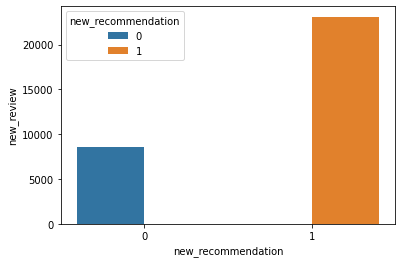

In [ ]:
polarity_count = steam_reviews.groupby(['new_recommendation']).count()
polarity_count = polarity_count.reset_index()

ax = sns.barplot(x = polarity_count['new_recommendation'], y = polarity_count['new_review'],
            data=polarity_count, hue='new_recommendation')

In [ ]:
print(not_recommended.shape, recommended.shape)

(8550,) (23112,)


In [ ]:
# Implement undersampling for handling inbalanced
nm = NearMiss(random_state = 42)
X_train, y_train = nm.fit_sample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_train.shape, y_train.shape

((13674, 10550), (13674,))

In [ ]:
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train)))

Original dataset shape Counter({1: 23112, 0: 8550})
Resampled dataset shape Counter({0: 6837, 1: 6837})


### **5.3 Select a K Value**

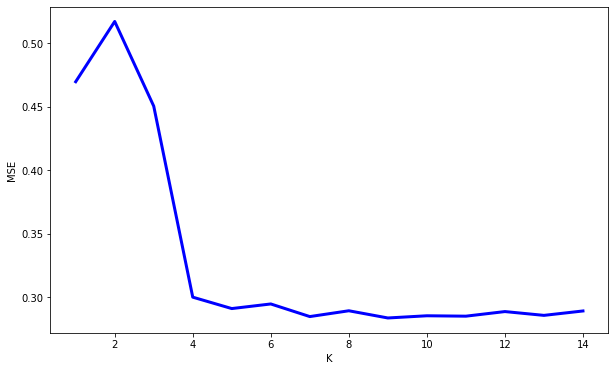

In [ ]:
mse = []

for i in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    mse.append(np.mean(pred_i != y_test))

plt.figure(figsize = (10, 6))
plt.plot(range(1, 15), mse, color = 'blue', linewidth = 3)
plt.xlabel('K')
plt.ylabel('MSE')
plt.show()

### **5.4 KNN Classifier**

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)
print(f'Score: {knn.score(X_test, y_test)}')

y_pred = knn.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse =  math.sqrt(mse)
print(f'RMSE: {rmse}')

Score: 0.7091425864519185
RMSE: 0.5393119816470625


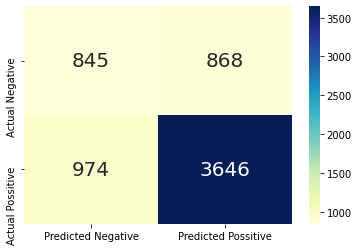

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, xticklabels=['Predicted Negative', 'Predicted Possitive'], yticklabels=['Actual Negative', 'Actual Possitive'],
annot=True, fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.46      0.49      0.48      1713
           1       0.81      0.79      0.80      4620

    accuracy                           0.71      6333
   macro avg       0.64      0.64      0.64      6333
weighted avg       0.71      0.71      0.71      6333



In [ ]:
print(accuracy_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
print(precision_score(y_test, y_pred))
print(f1_score(y_test, y_pred))

0.7091425864519185
0.7891774891774892
0.8077093486929553
0.7983358878913948


## **6. Model Building and Evaluation (Bag-of-words)**

In [ ]:
print('Accuracy of KNN Classsifier on training set: {:.2f}'
     .format(knn.score(X_train, y_train)))
print('Accuracy of KNN Classsifier on testing set : {:.2f}'
     .format(knn.score(X_test, y_test)))

Accuracy of KNN Classsifier on training set: 0.78
Accuracy of KNN Classsifier on testing set : 0.71


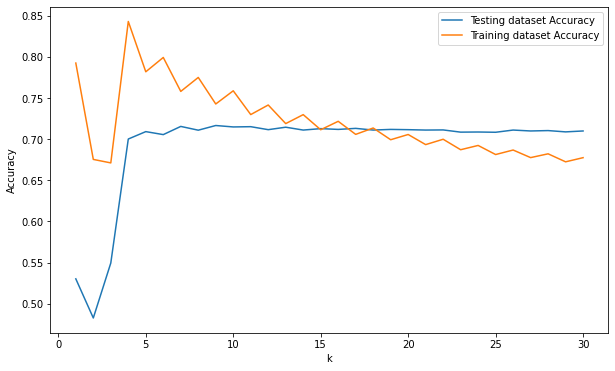

In [ ]:
neighbors = np.arange(1, 31) 
train_accuracy = np.empty(len(neighbors)) 
test_accuracy = np.empty(len(neighbors)) 
  
# Loop over K values 
for i, k in enumerate(neighbors): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_train, y_train) 
      
    # Compute traning and test data accuracy 
    train_accuracy[i] = knn.score(X_train, y_train) 
    test_accuracy[i] = knn.score(X_test, y_test) 

plt.figure(figsize=(10,6))
# Generate plot 
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy') 
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy') 

plt.legend() 
plt.xlabel('k') 
plt.ylabel('Accuracy') 
plt.show() 

In [ ]:
#Input Review
print('Test a custom review message')
print('Enter review to be analysed: ', end=" ")
test = []
test.append(input())
test_dtm = count_vectorizer.transform(test)
predLabel = knn.predict(test_dtm)
tags = ['Negative','Positive']

# Display Output
print('The review is predicted',tags[predLabel[0]])

Test a custom review message
Enter review to be analysed:  This is a bad game
The review is predicted Negative
